<a href="https://colab.research.google.com/github/leahandofir/earthformer-inference-experiments/blob/main/google_colab_experiments/ffs_library_drafts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install pypng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.2 MB/s eta 0:00:00


In [11]:
import png
import numpy as np

ir_img = png.Reader(file=open("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301010000.png", "rb")).asRGBA8()
pixels = ir_img[2]
np_arr = np.array([list(row) for row in pixels])
np_arr = np_arr.reshape(600,600,4)
np_arr.shape
grayscale_ir = 0.299 * np_arr[:,:,0] + 0.587 * np_arr[:,:,1] + 0.114 * np_arr[:,:,2]

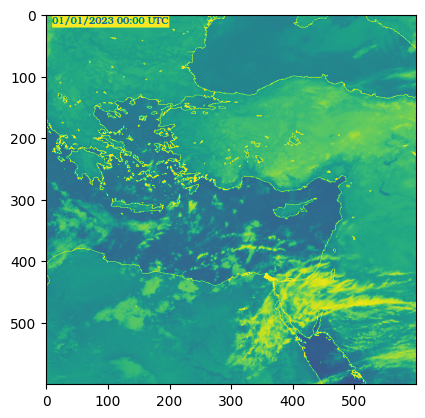

In [12]:
import matplotlib.pyplot as plt
plt.imshow(grayscale_ir)